In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm

# Archimedean Copula

Recall that an Archimedean copula can be expressed using it's generator function $\phi$ such that : 

\begin{equation}
  C(u,v) = \phi^{\leftarrow} ( \phi(u) + \phi(v)), \quad 0<u,v<1
\end{equation}

The generator $\phi(t)$ is a continuous, decreasing and convex funtion of t, with $\phi(0) = 1$.

## Simulate Archimedean Copula

In this section, we show how to simulate multiple Archimedean copulas which have been implemented.


First, we import the files from the corresponding github using the !git command

In [2]:
!git clone https://github.com/Aleboul/var_FMado/

Cloning into 'var_FMado'...
remote: Enumerating objects: 1070, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 1070 (delta 30), reused 1 (delta 1), pack-reused 1000
Receiving objects: 100% (1070/1070), 7.67 MiB | 19.11 MiB/s, done.
Resolving deltas: 100% (534/534), done.


It is now done, we can import the following files. 

In [3]:
from var_FMado.bivariate import base
from var_FMado.bivariate import archimedean
from var_FMado.bivariate import monte_carlo
from var_FMado.bivariate import extreme_value_copula
random_seed = 42

Now, we propose to simulate a Clayton Copula which can be defined by :

\begin{equation}
  C(u,v) = max\left(u^{-\theta} + v^{-\theta} -1 ,0\right)
\end{equation}

For that, the method **sample_unimargin()** permits us to sample from a copula.

In [ ]:
copula = archimedean.Clayton(random_seed = 42, theta = 4, n_sample = 5000)
sample = copula.sample_unimargin()

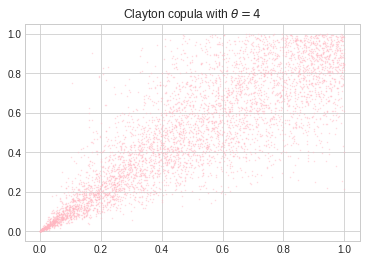

In [ ]:
fig, ax = plt.subplots()
ax.plot(sample[:,0], sample[:,1], '.',markersize = 1, alpha = 0.5, color = 'lightpink')
ax.set_title(r'Clayton copula with $\theta = 4$')
plt.show()

Now, we propose to simulate the Joe Copula which are given by :

\begin{equation}
  -\frac{1}{\theta}log\left[1 + \frac{(exp(-\theta u)-1)(exp(\theta v)-1)}{exp(-\theta) - 1}\right]
\end{equation}

In [ ]:
copula = archimedean.Frank(random_seed = 42, theta = -12, n_sample = 5000)
sample = copula.sample_unimargin()

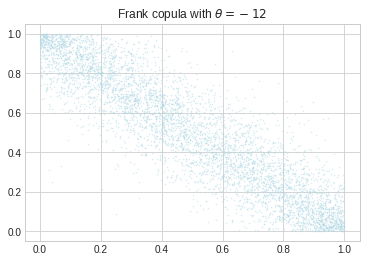

In [ ]:
fig, ax = plt.subplots()
ax.plot(sample[:,0], sample[:,1], '.',markersize = 1, alpha = 0.5, color = 'lightblue')
ax.set_title(r'Frank copula with $\theta = -12$')
plt.show()

In [ ]:
copula = archimedean.Frank(random_seed = 42, theta = 8, n_sample = 5000)
sample = copula.sample_unimargin()

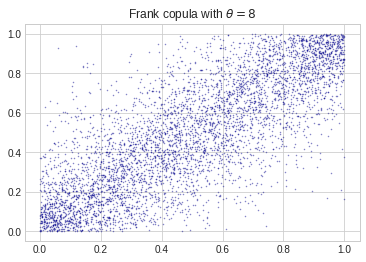

In [ ]:
fig, ax = plt.subplots()
ax.plot(sample[:,0], sample[:,1], '.',markersize = 1, alpha = 0.5, color = 'darkblue')
ax.set_title(r'Frank copula with $\theta = 8$')
plt.show()

## Compute numerically the variance of the FMadogram with Archimedean Copula

In this section, we show how to evaluate numerically the variance of the FMadogram for a given $\theta$ and $\lambda$. We recall that we compute the following integral 

\begin{equation}
  Var\left(\int_{[0,1]} N_C(u^\frac{1}{\lambda}, u^\frac{1}{1-\lambda}) \right)
\end{equation}

Which invole to solve numerically several double integrals (in general copula case).

For this purpose we illustrate this point with a Gumbel copula and a Frank copula. For the first one, we use a Gumbel copula with $\theta = 1$ (independent copula).

In [ ]:
n_iter = 200
n_sample = [32,64,128]
theta = 1
lmbd = 0.5
copula = archimedean.Gumbel(theta = theta, n_sample = np.max(n_sample))
Monte = monte_carlo.Monte_Carlo(n_iter= n_iter, n_sample= n_sample, lmbd = lmbd, copula= copula)

Let's represent our data, here we have inverted our simulation from a Gumbel copula with the generalized inverse of a gaussian's cdf. 

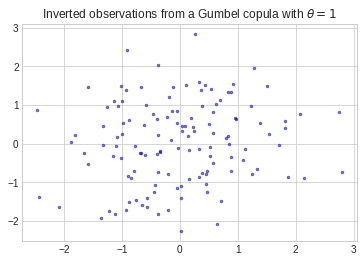

In [ ]:
sample = copula.sample(norm.ppf)
fig, ax = plt.subplots()
ax.plot(sample[:,0], sample[:,1], '.',markersize = 5, alpha = 0.5, color = 'darkblue')
ax.set_title(r'Inverted observations from a Gumbel copula with $\theta = 1$')
plt.show()

This cloud looks like as the realisation of a centered Gaussian vector and isotropic covariance matrix (with $\sigma^2 = 1$). And it is!

On lines below, we have initialized our Gumbel copula with $\theta = 1$ and with a length a sample of 128 observations.

Furthermore, we have initialized our Monte Carlo subject specifying the number of iterations (100) and the list of length of sample going from 32 to 128 ([32,64,128]). Using this object, we can obtain several estimator of FMadogram.

In [ ]:
df_FMado = Monte.simu(norm.ppf)
print(df_FMado)

        FMado      n   gp    scaled
0    0.150864   32.0  0.0  0.078097
1    0.153554   64.0  1.0  0.151881
2    0.136563  128.0  2.0  0.026628
3    0.142845   32.0  0.0  0.032734
4    0.149940   64.0  1.0  0.122972
..        ...    ...  ...       ...
595  0.116147   64.0  1.0 -0.147374
596  0.119996  128.0  2.0 -0.160805
597  0.142048   32.0  0.0  0.028226
598  0.123093   64.0  1.0 -0.091809
599  0.130901  128.0  2.0 -0.037428

[600 rows x 4 columns]


Here, we obtain 600 estimations of the FMadogram for an independent copula with a varying n. We make use of **copula.var_FMado(lmbd)** to compute the variance numerically.

In [ ]:
def gauss_function(x, x0, sigma):
    return np.sqrt(1 / (2*np.pi * sigma**2)) * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2) )

sigma = np.sqrt(copula.var_FMado(lmbd))

x = np.linspace(min(df_FMado['scaled']), max(df_FMado['scaled']), 1000)
gauss = gauss_function(x,0, sigma)

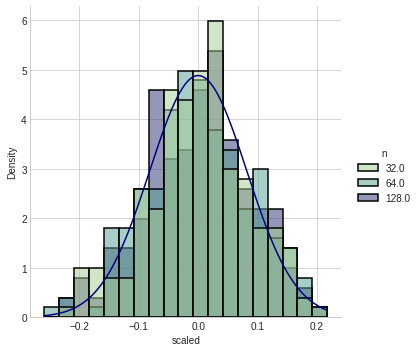

In [ ]:
sns.displot(data = df_FMado, x = "scaled", hue = "n", palette= "crest", kind = 'hist',stat = 'density', common_norm = False, alpha = 0.5, fill = True, linewidth = 1.5)
plt.plot(x,gauss, color = 'darkblue')

Now, let's go with some dependency. We now simulate a Gumbel copula with $\theta = 5$. Let's present our data !

In [ ]:
n_iter = 200
n_sample = [32,64,128]
theta = 5
lmbd = 0.5
copula = archimedean.Gumbel(theta = theta, n_sample = np.max(n_sample))
Monte = monte_carlo.Monte_Carlo(n_iter= n_iter, n_sample= n_sample, lmbd = lmbd,random_seed= random_seed, copula= copula)

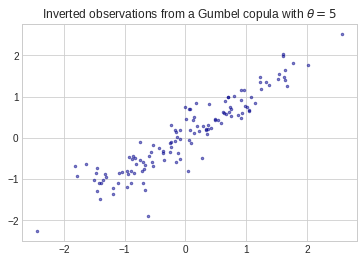

In [ ]:
sample = copula.sample(norm.ppf)
fig, ax = plt.subplots()
ax.plot(sample[:,0], sample[:,1], '.',markersize = 5, alpha = 0.5, color = 'darkblue')
ax.set_title(r'Inverted observations from a Gumbel copula with $\theta = 5$')
plt.show()

We obviously see a dependency among observation (a positive one)! We now make use of the same lines of code to show that we are able to compute the exact variance of our estimator.

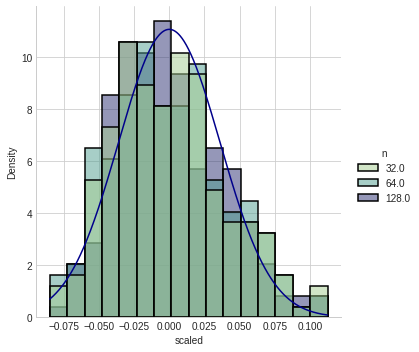

In [ ]:
df_FMado = Monte.simu(norm.ppf)
df_FMado

sigma = np.sqrt(copula.var_FMado(lmbd))

x = np.linspace(min(df_FMado['scaled']), max(df_FMado['scaled']), 1000)
gauss = gauss_function(x,0, sigma)

sns.displot(data = df_FMado, x = "scaled", hue = "n", palette= "crest", kind = 'hist',stat = 'density', common_norm = False, alpha = 0.5, fill = True, linewidth = 1.5)
plt.plot(x,gauss, color = 'darkblue')

Again, our estimations fits well with the dotted line which is the centered gaussian with variance computed numerically.

Now, we should use another Copula (maybe with negative dependence)! For that, Frank Copula will be the perfect candidate!

In [ ]:
n_iter = 200
n_sample = [32,64,128]
theta = -8
lmbd = 0.4
copula = archimedean.Frank(theta = theta, n_sample = np.max(n_sample))
Monte = monte_carlo.Monte_Carlo(n_iter= n_iter, n_sample= n_sample, lmbd = lmbd,random_seed= random_seed, copula= copula)

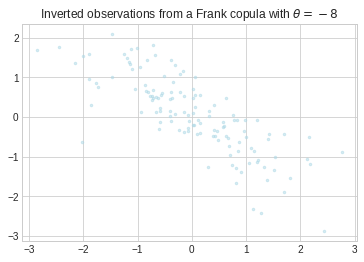

In [ ]:
sample = copula.sample(norm.ppf)
fig, ax = plt.subplots()
ax.plot(sample[:,0], sample[:,1], '.',markersize = 5, alpha = 0.5, color = 'lightblue')
ax.set_title(r'Inverted observations from a Frank copula with $\theta = -8$')
plt.show()

Here, we have our negative dependence!

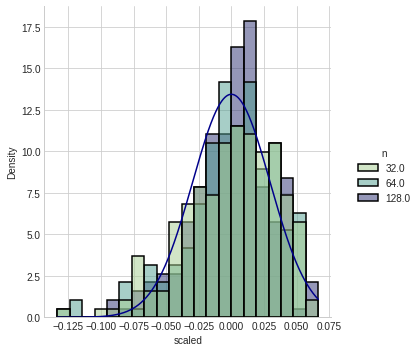

In [ ]:
df_FMado = Monte.simu(norm.ppf)
df_FMado

sigma = np.sqrt(copula.var_FMado(lmbd))

x = np.linspace(min(df_FMado['scaled']), max(df_FMado['scaled']), 1000)
gauss = gauss_function(x,0, sigma)

sns.displot(data = df_FMado, x = "scaled", hue = "n", palette= "crest", kind = 'hist',stat = 'density', common_norm = False, alpha = 0.5, fill = True, linewidth = 1.5)
plt.plot(x,gauss, color = 'darkblue')

# Extreme Value Copula

Recall the following result that characterizes bivariate extreme value copula :

A bivariate copula C is an extreme-value copula if and only if

\begin{equation}
  C(u,v) = (uv)^{A(log(v) / log(uv))}, \quad (u,v) \in (0,1]^2\setminus{(1,1)}
\end{equation}

where $A : [0,1] \rightarrow [1/2,1]$ is convex and satisfies $t \vee (1-t) \leq A(t) \leq 1$ for all $t \in [0,1]$ is the Pickands dependence function.

## Simulation Extreme Value Copula

First, we propose to simulate an asymmetric logistic copula whose Pickands is given by :

\begin{equation}
  (1-\psi_1)t + (1-\psi_2)(1-t) + \left[ (\psi_1t)^\theta + (\psi_2(1-t))^\theta \right]^\frac{1}{\theta}, \quad \theta \in [1, \infty), \quad \psi_1, \psi_2 \in [0,1]
\end{equation}

The special $\psi_1 = \psi_2 = 1$ corresponds to the (symmetric) model of Gumbel.

Here we take the $\theta = 5/2$, $\psi_1 = 0.1$, $\psi_2 = 1$.

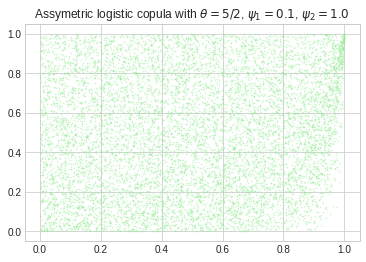

In [ ]:
theta = 5/2
psi1 = 0.1
psi2 = 1.0
n_sample = 10000

copula = extreme_value_copula.Asy_log(theta = theta, n_sample = n_sample, psi1 = psi1, psi2 = psi2)
sample = copula.sample_unimargin()

fig, ax = plt.subplots()
ax.plot(sample[:,0], sample[:,1], '.',markersize = 1, alpha = 0.5, color = 'lightgreen')
ax.set_title(r'Assymetric logistic copula with $\theta = 5/2$, $\psi_1 = 0.1$, $\psi_2  = 1.0$')
plt.show()

The second model proposed is the asymmetric negative logistic whose Pickands dependence function is given by :

\begin{equation}
  A(t) = 1 - \left[ (\psi_1(1-t))^{-\theta} + (\psi_2t)^{-\theta} \right]^\frac{-1}{\theta}
\end{equation}

with $\theta \in [1, \infty)$ and $\psi_1, \psi_2 \in [0,1]$. The special case $\psi_1 = \psi_2 = 1$ corresponds to the (symmetric) negative logistic of Galambos. We take here $\theta = 10$, $\psi_1 = 0.5$, $\psi_2 = 1$.

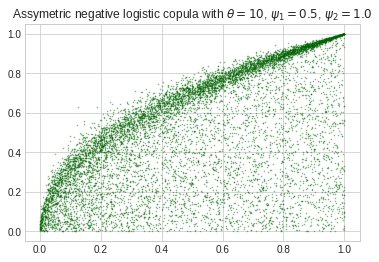

In [ ]:
theta = 10
psi1 = 0.5
psi2 = 1.0
n_sample = 10000

copula = extreme_value_copula.Asy_neg_log(theta = theta, n_sample = n_sample, psi1 = psi1, psi2 = psi2)
sample = copula.sample_unimargin()

fig, ax = plt.subplots()
ax.plot(sample[:,0], sample[:,1], '.',markersize = 1, alpha = 0.5, color = 'darkgreen')
ax.set_title(r'Assymetric negative logistic copula with $\theta = 10$, $\psi_1 = 0.5$, $\psi_2 = 1.0$')
plt.show()

The third model is the asymmetric mixed model, namely,

\begin{equation}
  A(t) = 1-(\theta + \kappa)t + \theta t^2 + \kappa t^3
\end{equation}

with parameters $\theta$ and $\kappa$ satisfying $\theta \geq 0$, $\theta + 3\kappa \geq 0$, $\theta + \kappa \leq 1$, $\theta + 2\kappa \geq 1$. The special case $\kappa = 0$ and $\theta \in [0,1]$ yields the (symmetric) mixed model.
We take in this simulation $\theta = 5/3$ , $\kappa = -1/3$.

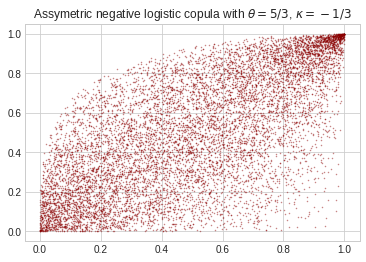

In [ ]:
theta = 5/3
psi1 = -1/3
n_sample = 10000

copula = extreme_value_copula.Asy_mix(theta = theta, n_sample = n_sample, psi1 = psi1, psi2 = psi2)
sample = copula.sample_unimargin()

fig, ax = plt.subplots()
ax.plot(sample[:,0], sample[:,1], '.',markersize = 1, alpha = 0.5, color = 'darkred')
ax.set_title(r'Assymetric negative logistic copula with $\theta = 5/3$, $\kappa = -1/3$')
plt.show()

The fourth model is the Hüssler Reiss model whose Pickands dependence function is defined by :

\begin{equation}
  A(t) = (1-t)\phi\left(\lambda + \frac{1}{2\lambda} log \frac{1-t}{t}\right) + t \phi \left( \lambda + \frac{1}{2\lambda} log(\frac{t}{1-t}) \right)
\end{equation}
where $\lambda \in (0, \infty)$ and $\phi$ is the cumulative distribution function of the standard gaussian law.

We take here $\lambda = 1$.

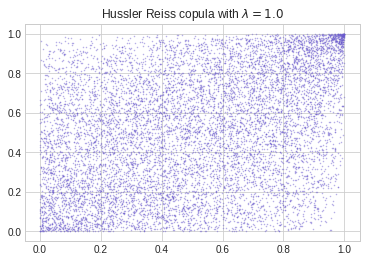

In [ ]:
theta = 1.0
n_sample = 10000

copula = extreme_value_copula.Hussler_Reiss(theta = theta, n_sample = n_sample, psi1 = psi1, psi2 = psi2)
sample = copula.sample_unimargin()

fig, ax = plt.subplots()
ax.plot(sample[:,0], sample[:,1], '.',markersize = 1, alpha = 0.5, color = 'slateblue')
ax.set_title(r'Hussler Reiss copula with $\lambda = 1.0$')
plt.show()

The fifth model is the t-EV in which :

\begin{align*}
  &A(w) = w t_{\chi +1}(z_w) + (1-w)t_{\chi +1}(z_{1-w}) \\
  & z_w = (1+\chi)^{1/2}[{w/(1-w)}^\frac{1}{\chi} - \rho](1-\rho^2)^{-1/2}
\end{align*}

For the simulation, $\rho = 0.8$ and $\chi = 0.2$.

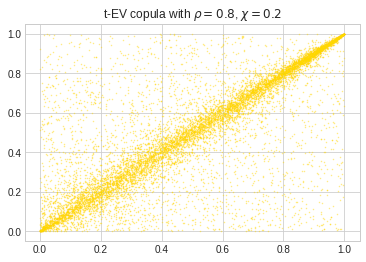

In [ ]:
theta = 0.8
psi1 = 0.2
n_sample = 10000

copula = extreme_value_copula.Student(theta = theta, n_sample = n_sample, psi1 = psi1, psi2 = psi2)
sample = copula.sample_unimargin()

fig, ax = plt.subplots()
ax.plot(sample[:,0], sample[:,1], '.',markersize = 1, alpha = 0.5, color = 'gold')
ax.set_title(r't-EV copula with $\rho = 0.8$, $\chi = 0.2$')
plt.show()

## Compute numerically the asymptotic variance of the FMadogram with Archimedean Copula

Recall that we found that, in the specific case of extreme value copula that the asymptotic variance of the FMadogram can be expressed in a more clever way :

\begin{align*}
                &f(\lambda,A) \left(\frac{A(\lambda)}{A(\lambda) + 2\lambda(1-\lambda)} + \frac{\kappa(\lambda,A)^2(1-\lambda)}{2A(\lambda) - (1-\lambda) + 2\lambda(1-1\lambda)} + \frac{\zeta(\lambda,A)^2 \lambda}{2A(\lambda)- \lambda + 2\lambda(1-\lambda)}\right) \\
                &-2\kappa(\lambda,A) f(\lambda,A) \left( \frac{(1-\lambda)^2-A(\lambda)}{2A(\lambda) - (1-\lambda) + 2\lambda(1-\lambda)}\right) -2\kappa(\lambda,A)\lambda(1-\lambda)\int_{[0,\lambda]}\left[A(s) + (1-s)(A_2(\lambda)-(1-\lambda)-1) -s\lambda +1\right]^{-2}ds \\
                &-2\zeta(\lambda,A)f(\lambda,A)\left(\frac{\lambda^2 - A(\lambda)}{2A(\lambda) - \lambda + 2\lambda(1-\lambda)} \right) - 2\zeta(\lambda,A) \lambda(1-\lambda) \int_{[\lambda,1]} \left[A(s) +s(A_1(\lambda)-1-\lambda) -(1-s)(1-\lambda) + 1\right]^{-2}ds \\
                &-2f(\lambda,A)\kappa(\lambda,A)\zeta(\lambda,A) + 2\kappa(\lambda,A)\zeta(\lambda,A)\lambda(1-\lambda)\int_{[0,1]} \left[A(s) + (1-s)(A_2(\lambda) - (1-\lambda) -1) + s(A_1(\lambda)-\lambda-1)+1\right]^{-2}ds
\end{align*}

And we make use of this expression to compute numerically the asymptotic variance.


In [ ]:
n_iter = 500
n_sample = [32,64,128]
theta = 5/2
psi1 = 0.1
psi2 = 1.0
copula = extreme_value_copula.Asy_log(theta = theta, n_sample = np.max(n_sample), psi1 = psi1, psi2 = psi2)
Monte = monte_carlo.Monte_Carlo(n_iter= n_iter, n_sample= n_sample, lmbd = lmbd,random_seed= random_seed, copula= copula)

In order to compute the asymptotic variance, we make use of the function **extreme_var_FMado** only available for an object of class Extreme.

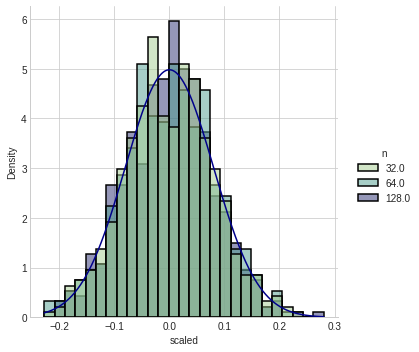

In [ ]:
df_FMado = Monte.simu(norm.ppf)
df_FMado

sigma = np.sqrt(copula.var_FMado(lmbd))

x = np.linspace(min(df_FMado['scaled']), max(df_FMado['scaled']), 1000)
gauss = gauss_function(x,0, sigma)

sns.displot(data = df_FMado, x = "scaled", hue = "n", palette= "crest", kind = 'hist',stat = 'density', common_norm = False, alpha = 0.5, fill = True, linewidth = 1.5)
plt.plot(x,gauss, color = 'darkblue')

We now do it for our second model.

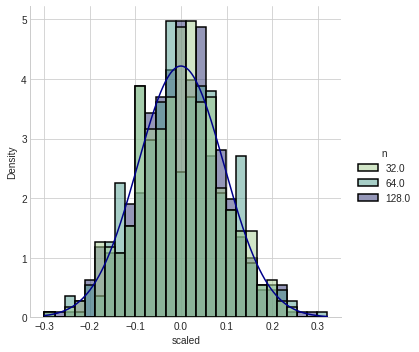

In [ ]:
n_iter = 500
n_sample = [32,64,128]
theta = 10
psi1 = 0.5
psi2 = 1.0
lmbd = 0.5
random_seed = 42
copula = extreme_value_copula.Asy_neg_log(theta = theta, n_sample = np.max(n_sample), psi1 = psi1, psi2 = psi2)
Monte = monte_carlo.Monte_Carlo(n_iter= n_iter, n_sample= n_sample, lmbd = lmbd,random_seed= random_seed, copula= copula)

df_FMado = Monte.simu(norm.ppf)
df_FMado

sigma = np.sqrt(copula.var_FMado(lmbd))

x = np.linspace(min(df_FMado['scaled']), max(df_FMado['scaled']), 1000)
gauss = gauss_function(x,0, sigma)

sns.displot(data = df_FMado, x = "scaled", hue = "n", palette= "crest", kind = 'hist',stat = 'density', common_norm = False, alpha = 0.5, fill = True, linewidth = 1.5)
plt.plot(x,gauss, color = 'darkblue')

For the third model, we may compute

**These lines below took some time!**

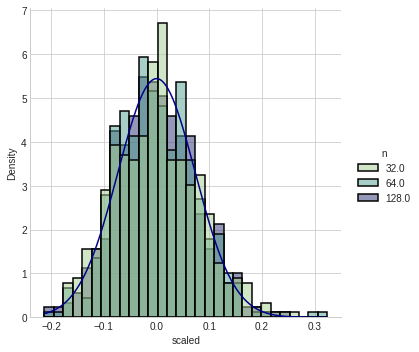

In [ ]:
n_iter = 500
n_sample = [32,64,128]
theta = 0.8
psi1 = 0.1
lmbd = 0.5
random_seed = 42
copula = extreme_value_copula.Student(theta = theta, n_sample = np.max(n_sample), psi1 = psi1)
Monte = monte_carlo.Monte_Carlo(n_iter= n_iter, n_sample= n_sample, lmbd = lmbd,random_seed= random_seed, copula= copula)

df_FMado = Monte.simu(norm.ppf)
df_FMado

sigma = np.sqrt(copula.var_FMado(lmbd))

x = np.linspace(min(df_FMado['scaled']), max(df_FMado['scaled']), 1000)
gauss = gauss_function(x,0, sigma)

sns.displot(data = df_FMado, x = "scaled", hue = "n", palette= "crest", kind = 'hist',stat = 'density', common_norm = False, alpha = 0.5, fill = True, linewidth = 1.5)
plt.plot(x,gauss, color = 'darkblue')

## 3D representation of the asymptotic density of $(\hat{\nu}_T(\lambda))_{\lambda \in [0,1]}$

Text(0.5, 0, 'Z value')

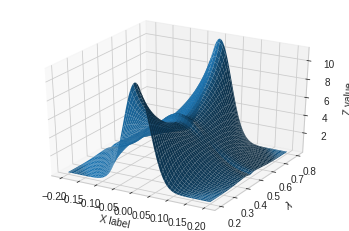

In [ ]:
LMBD = np.linspace(0.20,0.80,100)
X = np.linspace(-0.2,0.2,100)

def gauss_function(x, sigma):
    return np.sqrt(1 / (2*np.pi * sigma**2)) * np.exp(-(x) ** 2 / (2 * sigma ** 2) )

theta = 0.8
psi1 = 0.1

copula = extreme_value_copula.Student(theta = theta, psi1 = psi1)
var_ = []

zs = []

for lmbd in LMBD:
    for x in X:
        sigma  = np.sqrt(copula.var_FMado(lmbd))
        value_ = gauss_function(x, sigma)
        zs.append(value_)
X, LMBD = np.meshgrid(X, LMBD)
zs = np.array(zs)
Z = zs.reshape(X.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, LMBD, Z)
ax.set_xlabel('X label')
ax.set_ylabel(r'$\lambda$')
ax.set_zlabel("Z value")